In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading dataset
df_train = pd.read_csv(r"/content/Train.csv")

In [6]:
df_train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [8]:
#Finding null values
df_train.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [9]:
#Replacing null values

In [10]:
df_train['customer_age'].fillna(df_train['customer_age'].mean(), inplace=True)

In [11]:
df_train['marital'].fillna(df_train['marital'].mode()[0], inplace=True)

In [12]:
df_train['balance'].fillna(df_train['balance'].mean(), inplace=True)

In [13]:
df_train['personal_loan'].fillna(df_train['personal_loan'].mode()[0], inplace=True)

In [14]:
df_train['last_contact_duration'].fillna(df_train['last_contact_duration'].mean(), inplace=True)

In [15]:
df_train['num_contacts_in_campaign'].fillna(df_train['num_contacts_in_campaign'].mean(), inplace=True)

In [16]:
df_train['days_since_prev_campaign_contact'].fillna(df_train['days_since_prev_campaign_contact'].mean(), inplace=True)

In [17]:
df_train.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [18]:
#Encoding
from sklearn.preprocessing import LabelEncoder

In [19]:
categorical_features = ['job_type', 'marital', 'education', 'default','id',
                    'housing_loan', 'personal_loan', 'communication_type',
                    'month', 'prev_campaign_outcome']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le
print(df_train)

          id  customer_age  job_type  marital  education  default  balance  \
0      26367          28.0         4        2          2        0    285.0   
1      17403          34.0         1        1          1        0    934.0   
2        418          46.0         9        1          1        0    656.0   
3      26468          34.0         7        2          1        0      2.0   
4      24163          41.0         1        1          0        0   1352.0   
...      ...           ...       ...      ...        ...      ...      ...   
31642  13459          58.0         0        1          1        0    567.0   
31643   8131          51.0         4        1          2        0   1072.0   
31644  27025          41.0        10        1          0        0    242.0   
31645  27680          48.0         7        1          1        0   2699.0   
31646   5623          38.0         9        2          2        0   1045.0   

       housing_loan  personal_loan  communication_type  day_of_

Exploratory data Analysis


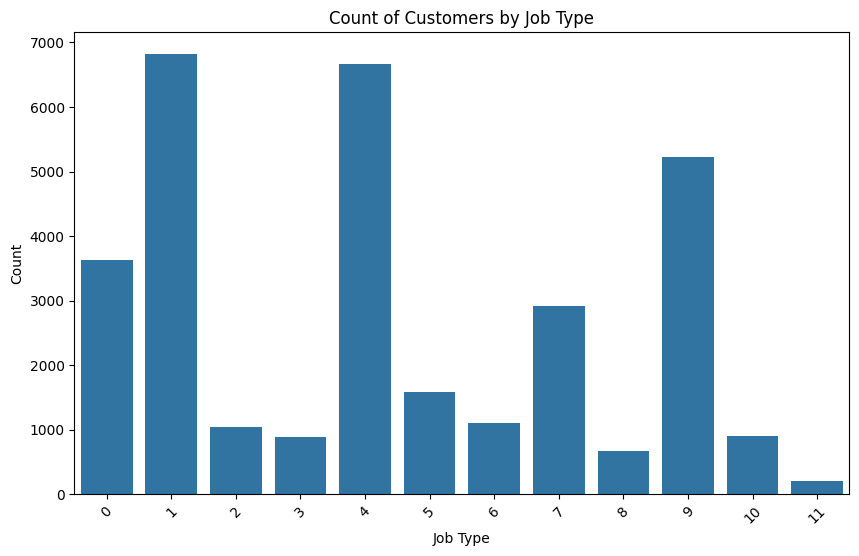

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='job_type')
plt.title('Count of Customers by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

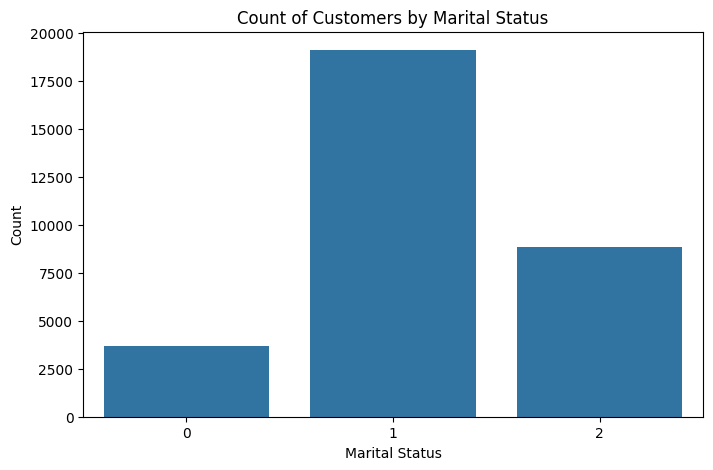

In [21]:
# Countplot of marital status
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='marital')
plt.title('Count of Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

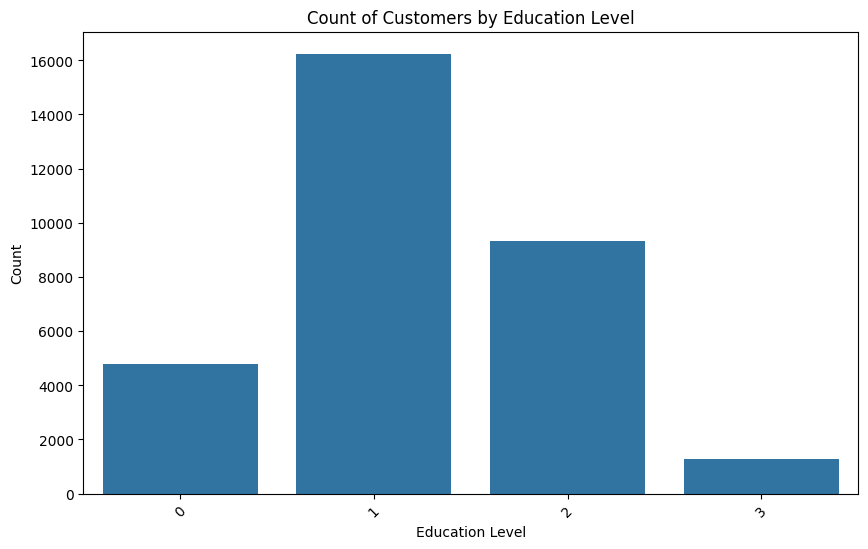

In [22]:
# Countplot of education level
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='education')
plt.title('Count of Customers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

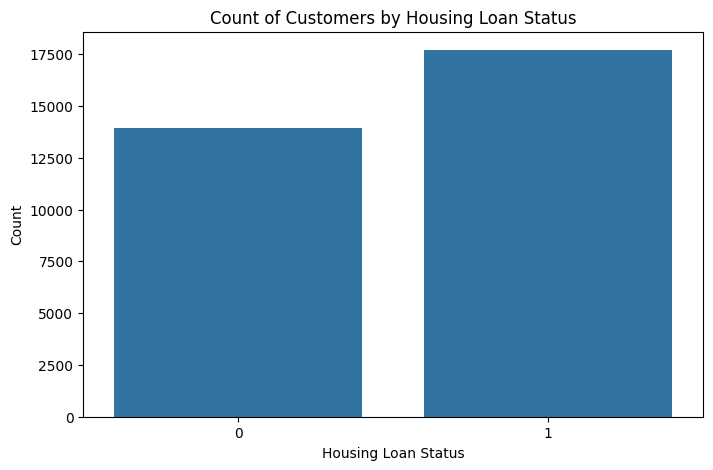

In [23]:
# Countplot of housing loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='housing_loan')
plt.title('Count of Customers by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.show()

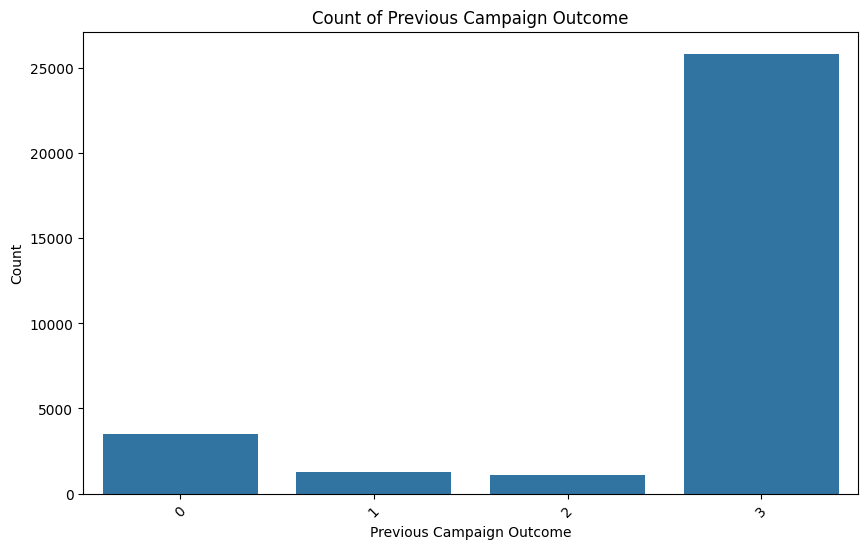

In [24]:
# Countplot of previous campaign outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='prev_campaign_outcome')
plt.title('Count of Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

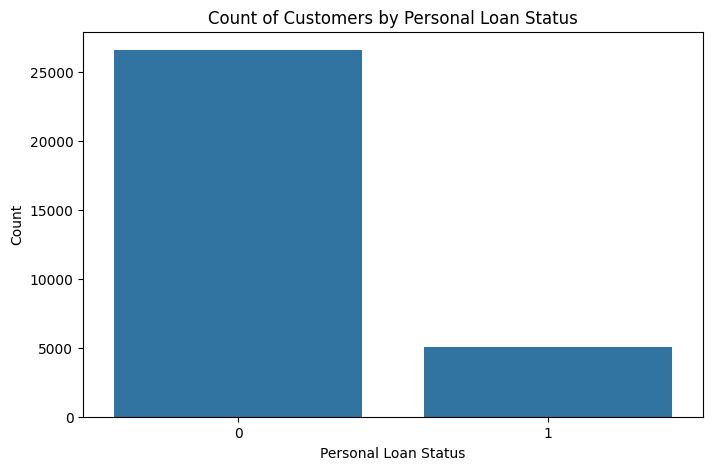

In [25]:
# Countplot of personal loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='personal_loan')
plt.title('Count of Customers by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.show()

WEEK 2

In [26]:
from sklearn.preprocessing import StandardScaler #for data scaling
from sklearn.decomposition import PCA # Principal Component Analysis for dimensional reduction
from sklearn.cluster import KMeans # for Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign',
            'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

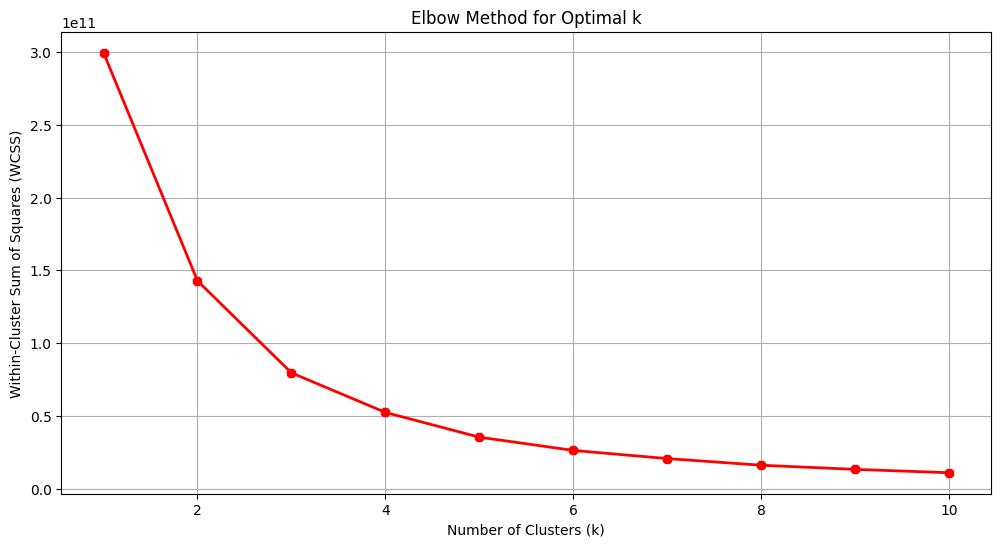

In [27]:
x1 = df_train[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign',
         'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']].values

# Initialize an empty list to store within-cluster sum of squares (WCSS) values
wcss = []

# Perform K-means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

WEEK 3

In [28]:
X = df_train[features]

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Principal Component Analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [31]:
#Kmeans, number of optimal cluster is 6
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [32]:
df_train['cluster'] = kmeans.labels_

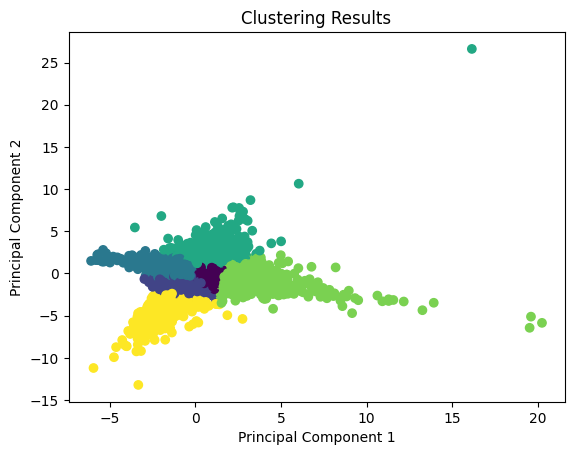

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_train['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')#This show s
plt.show()